<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Import Libraries
</h1>
</div>

In [1]:
from tensorflow.keras.applications import DenseNet121, Xception, InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from PIL import Image
import tensorflow as tf
import mplcursors
from tensorflow.keras import models, layers
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import random
import numpy as np
import os
import shutil
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Evaluation Plotter

</h1>
</div>

In [2]:
def plot_plots(data):
    plt.style.use('dark_background')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(data['loss'], color='cyan', linewidth=2, label='Training Loss')
    ax1.plot(data['val_loss'], color='magenta', linewidth=2, label='Validation Loss')
    ax1.set_xlabel('Epochs', color='white')
    ax1.set_ylabel('Loss', color='white')
    ax1.set_title('Loss Over Epochs', color='white')
    ax1.tick_params(axis='y', colors='white')
    ax1.legend(loc='upper right', facecolor='black', edgecolor='white', fontsize=10)
    ax1.grid(color='gray', linestyle='--', linewidth=0.5)
    mplcursors.cursor(ax1, hover=True)

    ax2.plot(data['accuracy'], color='lime', linewidth=2, label='Training Accuracy')
    ax2.plot(data['val_accuracy'], color='orange', linewidth=2, label='Validation Accuracy')
    ax2.set_xlabel('Epochs', color='white')
    ax2.set_ylabel('Accuracy', color='white')
    ax2.set_title('Accuracy Over Epochs', color='white')
    ax2.tick_params(axis='y', colors='white')
    ax2.legend(loc='lower right', facecolor='black', edgecolor='white', fontsize=10)
    ax2.grid(color='gray', linestyle='--', linewidth=0.5)
    mplcursors.cursor(ax2, hover=True)

    plt.tight_layout()
    plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Download Dataset from ==> <a href = "https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia"> Kaggle </a>

</h1>
</div>

In [3]:
# !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

zsh:1: command not found: kaggle


## **Unzip Folder**

In [5]:
# import zipfile
# zip_ref = zipfile.ZipFile('/Users/innovationinsight/Desktop/Umer/chest-xray-pneumonia.zip', 'r')
# zip_ref.extractall('/content/chest-xray-pneumonia')
# zip_ref.close()

# **Spliting Data:**
- 80% ==> Training
- 20% ==> Testing
- 20% ==> Validation

## **Splitting**

In [6]:
normal_dir = "/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data/NORMAL"
pneumonia_dir = "/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data/PNEUMONIA"

base_dir = "/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
val_dir = os.path.join(base_dir, "val")

classes = ["NORMAL", "PNEUMONIA"]

for split in [train_dir, test_dir, val_dir]:
    os.makedirs(split, exist_ok=True)
    for cls in classes:
        os.makedirs(os.path.join(split, cls), exist_ok=True)

num_images_per_class = 4274
train_split = int(0.8 * num_images_per_class)
test_split = int(0.15 * num_images_per_class)
val_split = num_images_per_class - train_split - test_split

def split_data(source_dir, train_dest, test_dest, val_dest):
    all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]
    random.shuffle(all_files)
    
    selected_files = all_files[:num_images_per_class]
    
    train_files = selected_files[:train_split]
    test_files = selected_files[train_split:train_split + test_split]
    val_files = selected_files[train_split + test_split:]
    
    for file in train_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(train_dest, file))
    for file in test_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(test_dest, file))
    for file in val_files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(val_dest, file))

for cls in classes:
    source_dir = os.path.join(base_dir, cls)
    split_data(
        source_dir,
        train_dest=os.path.join(train_dir, cls),
        test_dest=os.path.join(test_dir, cls),
        val_dest=os.path.join(val_dir, cls)
    )

print(f"Data successfully split into train, test, and val directories with {train_split} images per class in train, {test_split} in test, and {val_split} in val.")


Data successfully split into train, test, and val directories with 3419 images per class in train, 641 in test, and 214 in val.


<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Image Generator

</h1>
</div>

**WORKING**
- The ImageDataGenerator function is used to load image data from a directory.
- Images are resized to 256x256 pixels and grouped into batches of 32 for efficient processing.
- Labels are inferred from the directory structure and represented in a categorical format.
- Pixel values of the images are normalized to a range of [0, 1] by dividing by 255.0 for consistent model training.

In [80]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Training, Testing and Validation Data

</h1>
</div>

In [155]:
train_data = train_datagen.flow_from_directory(
    "/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data/balanced_splitted/train",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
)
val_data = val_datagen.flow_from_directory(
    "/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data/balanced_splitted/val",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
)
test_data = test_datagen.flow_from_directory(
    "/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data/balanced_splitted/test",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
)

Found 6837 images belonging to 2 classes.
Found 428 images belonging to 2 classes.
Found 1282 images belonging to 2 classes.


<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Class Counts

</h1>
</div>

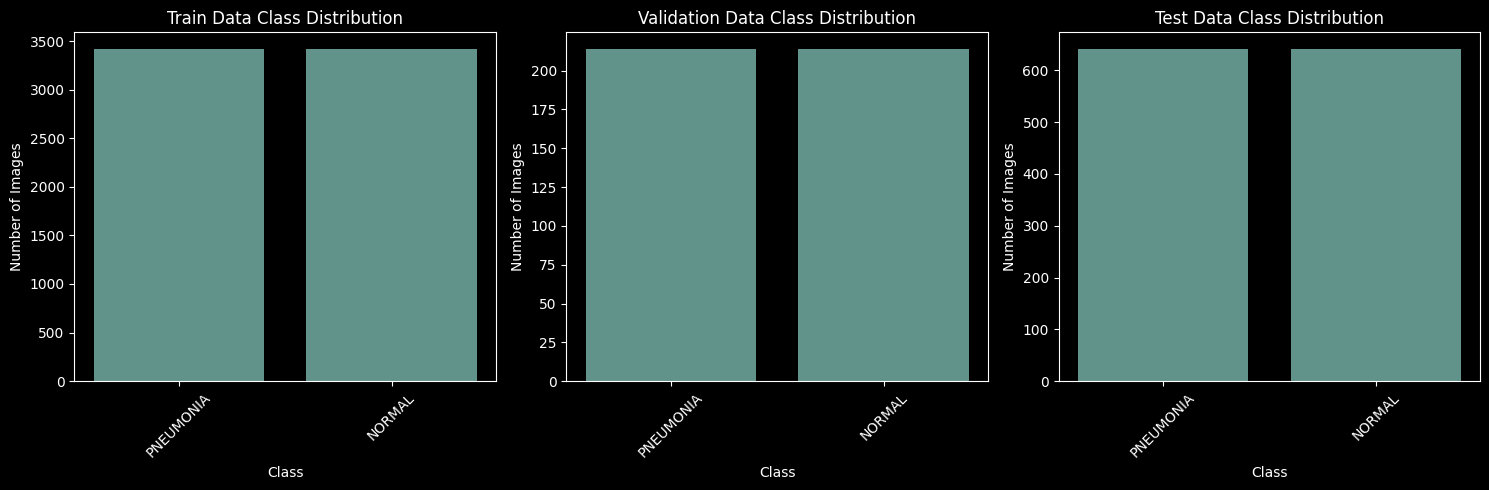

In [196]:
import os
import matplotlib.pyplot as plt

def count_images(directory):
    """Counts the number of images for each class in a given directory."""
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

def plot_class_distribution_subplot(directories):
    """Plots the class distribution of images for multiple directories in subplots."""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes = axes.flatten()

    for idx, (dataset_name, directory) in enumerate(directories.items()):
        class_counts = count_images(directory[0])
        
        axes[idx].bar(class_counts.keys(), class_counts.values(), alpha=0.7)
        axes[idx].set_title(f"{dataset_name} Class Distribution")
        axes[idx].set_xlabel('Class')
        axes[idx].set_ylabel('Number of Images')
        axes[idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
directories = {
    "Train Data": ["/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data/balanced_splitted/train"],
    "Validation Data": ["/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data/balanced_splitted/val"],
    "Test Data": ["/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data/balanced_splitted/test"]
}
plot_class_distribution_subplot(directories)


<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Visualization    
</h1>
</div>

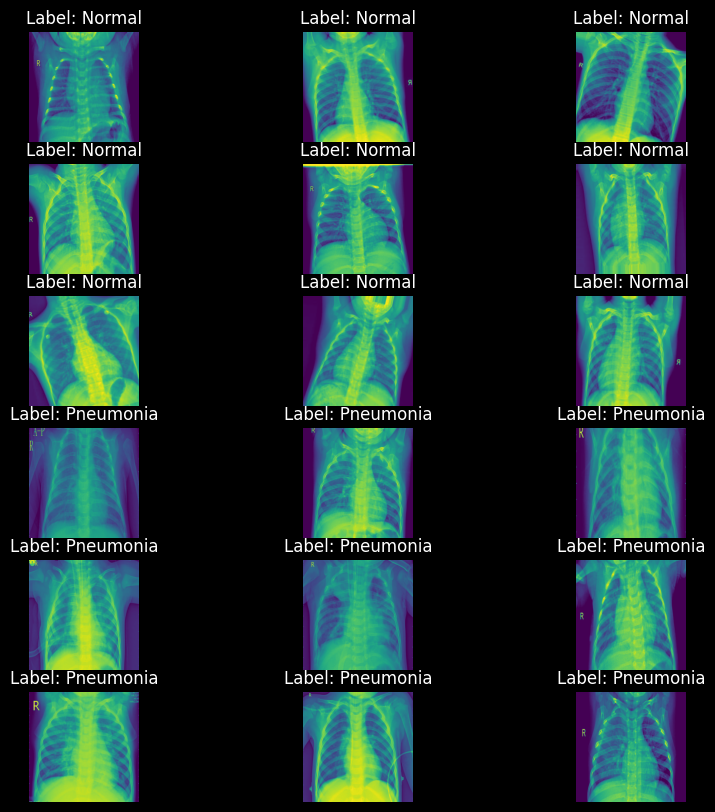

In [139]:
train_dir = "/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data/balanced_splitted/train"
test_dir = "/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data/balanced_splitted/test"
val_dir = "/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data/balanced_splitted/val"

def get_images_from_folder(folder, class_name, num_images=9):
    class_dir = os.path.join(folder, class_name)
    images = []
    
    image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
    
    selected_images = random.sample(image_files, num_images)
    
    for img_file in selected_images:
        img_path = os.path.join(class_dir, img_file)
        img = Image.open(img_path).resize((256, 256))
        images.append(img)
    
    return images

num_images_to_plot = 9
images_normal = get_images_from_folder(train_dir, "NORMAL", num_images=num_images_to_plot)
images_pneumonia = get_images_from_folder(train_dir, "PNEUMONIA", num_images=num_images_to_plot)
plt.figure(figsize=(10, 10))

for i in range(num_images_to_plot):
    plt.subplot(6, 3, i+1)
    plt.imshow(images_normal[i])
    plt.title("Label: Normal")
    plt.axis("off")
for i in range(num_images_to_plot):
    plt.subplot(6, 3, num_images_to_plot + i + 1)
    plt.imshow(images_pneumonia[i])
    plt.title("Label: Pneumonia")
    plt.axis("off")

plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Transfer Learning with DenseNet121
</h1>
</div>

**WORKING**
- The code initializes a `InceptionV3` model with weights pre-trained on the ImageNet dataset.
- The `include_top=False argument` specifies that the model should not include the fully connected layers at the top of the network, which are typically used for ImageNet classification.
- The `input_shape=(150,150,3) argument` specifies the shape of the input images that the model expects, which is `150x150` pixels with 3 channels (RGB).
- The initialized model `conv_base` can be used as a feature extractor to extract features from images, which can then be used as input to a custom classification head.

In [140]:
base_model = InceptionV3(
    weights=None,
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.load_weights('/Users/innovationinsight/Desktop/Umer/allfiles/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')


In [141]:
# base_model.summary()

**WHY FALSE ?**
- Setting conv_base.trainable = False freezes the weights of the pre-trained DenseNet121 model.
- This is done to prevent the weights from being updated during the training of the custom classification head.
- Freezing the pre-trained weights helps in utilizing the learned features from the ImageNet dataset without altering them.
- It also reduces the computational cost and training time, as only the weights of the custom classification head will be trained.

In [142]:
base_model.trainable = False

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Sequential Model
</h1>
</div>

**WORKING**

- It initializes a Sequential model and adds the `pre-trained` InceptionV3` model (base_model) ` as the base.
- The model flattens the output from the base model and adds two fully connected layers with `ReLU activation`.
- `Batch normalization` is applied after each fully connected layer to improve training stability and speed.

In [143]:
model = Sequential([
    base_model,
    BatchNormalization(),
    Dropout(0.5),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(2, activation='softmax')
])

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Compile Model
</h1>
</div>

**WORKING**

- The compile method is used to configure the model for training.
- The optimizer=Adam(learning_rate=0.0001) argument specifies the Adam optimizer with a learning rate of 0.0001.
- The loss='categorical_crossentropy' argument specifies the loss function used for training, which is categorical crossentropy for multi-class classification.
- The metrics=['accuracy'] argument specifies the metric used to evaluate the model, which is accuracy in this case.

In [144]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Training
</h1>
</div>

**WORKING**
- The `fit` method is used to train the model on the training data (`train_data`) for a specified number of epochs (100 in this case).
- The `validation_data=val_data` argument specifies the validation data to evaluate the model performance after each epoch.
- The `history` variable stores the training history, including metrics such as loss and accuracy, which can be used for analysis and visualization.

In [119]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [145]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data,
)

Epoch 1/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 64s 283ms/step - accuracy: 0.7514 - loss: 0.5952 - val_accuracy: 0.9089 - val_loss: 0.2478
Epoch 2/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 60s 282ms/step - accuracy: 0.8777 - loss: 0.3056 - val_accuracy: 0.9252 - val_loss: 0.1993
Epoch 3/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 59s 277ms/step - accuracy: 0.8884 - loss: 0.2856 - val_accuracy: 0.9136 - val_loss: 0.2031
Epoch 4/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 59s 277ms/step - accuracy: 0.9044 - loss: 0.2566 - val_accuracy: 0.9299 - val_loss: 0.1899
Epoch 5/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 60s 278ms/step - accuracy: 0.9010 - loss: 0.2495 - val_accuracy: 0.9276 - val_loss: 0.1832
Epoch 6/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 60s 279ms/step - accuracy: 0.9064 - loss: 0.2376 - val_accuracy: 0.9369 - val_loss: 0.1641
Epoch 7/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 60s 279ms/step - accuracy: 0.9104 - loss: 0.2311 - val_accuracy: 0.9393 - val_loss: 0.1707
Epoch 8/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 60s 280ms/step - accuracy: 0.9003 - loss: 0

<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">
    Evaluation
</h1>
</div>


# **😌 Testing Accuracy 93.06%**:
  - Means that, when the model is evaluated on a separate set of data that it has not seen during training or validation, it correctly predicts the outcome 93.06% of the time. This is a good result and indicates that the model is performing well and generalizes well to new, unseen data.

In [177]:
evaluate = model.evaluate(test_data)

print(f"Test Loss: {evaluate[0]}")
print(f"Test Accuracy: {evaluate[1] * 100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.9317 - loss: 0.1620
Test Loss: 0.17231164872646332
Test Accuracy: 93.06%


In [147]:
import pandas as pd
result_adam = pd.DataFrame(history.history)
result_adam.tail(5)

,accuracy,loss,val_accuracy,val_loss
5,0.906977,0.238519,0.936916,0.164060
6,0.907708,0.233956,0.939252,0.170717
7,0.906538,0.240545,0.934579,0.181091
8,0.909317,0.228020,0.929907,0.171102
9,0.911365,0.219348,0.929907,0.167672


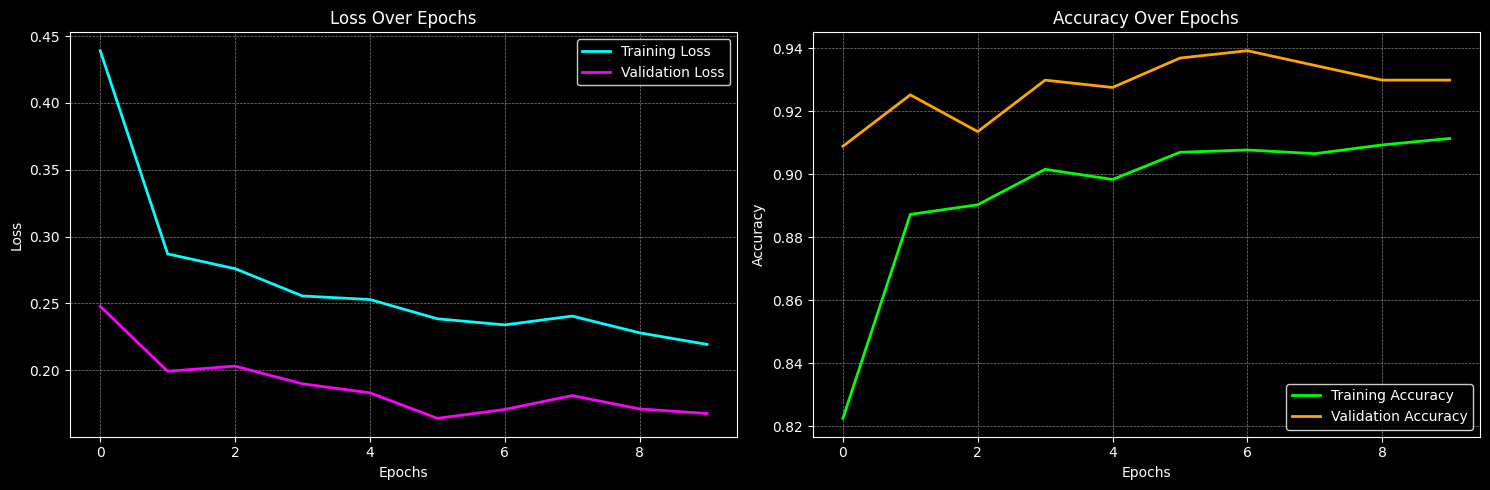

In [149]:
plot_plots(result_adam)

## **Prediction On Test Data**

In [173]:
def get_predicted_img_label(path):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(150, 150))
    class_labels = list(train_data.class_indices.keys())
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100
    print(predicted_class)
    print(f"Confidence: {confidence:.2f}%")

In [193]:
path_norml = "/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data/balanced_splitted/test/NORMAL/aug_0_4.jpeg"
path_pneumonia = "/Users/innovationinsight/Desktop/Umer/chest_xray/chest_xray/all_data/balanced_data/balanced_splitted/test/PNEUMONIA/person1535_bacteria_4016.jpeg"
get_predicted_img_label(path_norml)
get_predicted_img_label(path_pneumonia)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
NORMAL
Confidence: 91.40%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
PNEUMONIA
Confidence: 99.58%


<div style="border-radius: 30px 0 30px 0px; border: 2px solid rgb(255, 255, 255); padding: 20px; background-color:rgb(0, 0, 0); text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0); width: 60%; margin: auto;">
    <h1 style="color:rgb(255, 255, 255); text-shadow: 2px 2px 4px rgba(0, 0, 0); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Save Model</h1>
</div>

In [197]:
model.save('pnemonia_classifier_v2.h5')